# Quantifying neighbors distribution in a tissue

Similar to the parametric map we can extend the quantification to the direct neighborhood of each label.
From a parametric map, we can extract value like minimum, maximum, standard deviation of the quantified value expressed in the direct neighborhood of each label.

This can be apply for intensity but also on neighbor count which can provide information on the cell distribution in a tissue locally.

In [1]:
import pyclesperanto as cle
import numpy as np
import matplotlib.pyplot as plt

cle.select_device(1, "gpu")

(OpenCL) NVIDIA GeForce RTX 4090 (OpenCL 3.0 CUDA)
	Vendor:                      NVIDIA Corporation
	Driver Version:              535.274.02
	Device Type:                 GPU
	Compute Units:               128
	Global Memory Size:          24217 MB
	Local Memory Size:           0 MB
	Maximum Buffer Size:         6054 MB
	Max Clock Frequency:         2625 MHz
	Image Support:               Yes

## Let's generate a tissue

We generate a 2d artificial tissue which will become more "chaotique" from left to right.

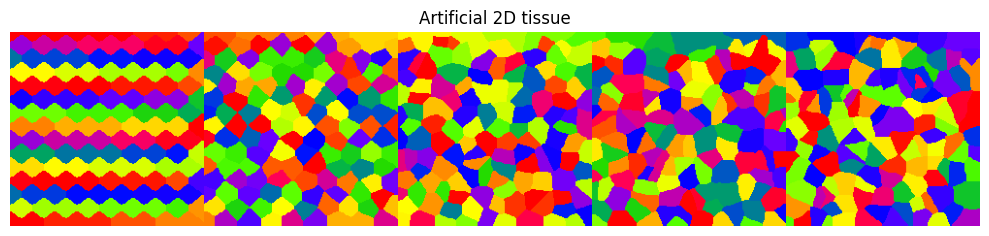

In [2]:
def generate_example_data():
    sigmas = [0, 2, 5, 8, 10]
    result = None
    for sigma in sigmas:
        tissue = cle.artificial_tissue(
            sigma_x=sigma, 
            sigma_y=sigma, 
            sigma_z=0,
            width=200, 
            height=200,
            delta_x=23,
            delta_y=14)
        if result is None:
            result = tissue
        else:
            result = cle.concatenate(result, tissue, axis=0)
    
    borders = cle.detect_label_edges(result)
    objects = cle.binary_not(borders)
    result = cle.voronoi_labeling(objects)
    
    return result

labels = generate_example_data()

fig, axs = plt.subplots(1,1, figsize=(10,5))
cax = axs.imshow(labels, cmap="prism")
axs.set_axis_off()
axs.set_title("Artificial 2D tissue")
plt.tight_layout()
plt.show()

We can observe the difference of organisation, from regular to more random. From this image we can extract for each label its number of neighbors

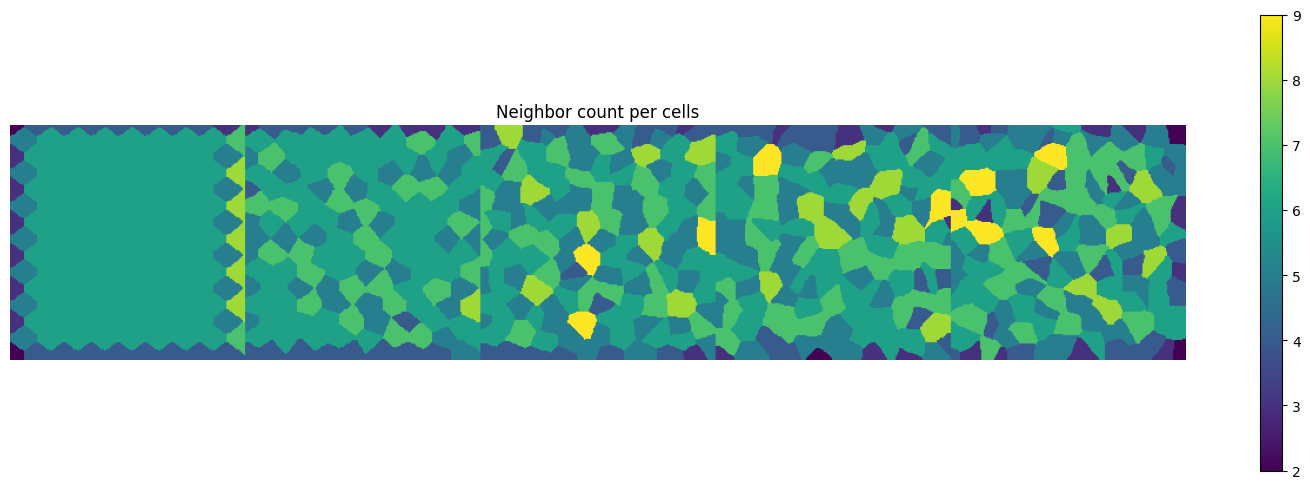

In [3]:
neighbor_count_map = cle.touching_neighbor_count_map(labels)

fig, axs = plt.subplots(1,1, figsize=(15,5))
cax = axs.imshow(neighbor_count_map)
axs.set_axis_off()
axs.set_title("Neighbor count per cells")
plt.colorbar(cax, ax=axs)
plt.tight_layout()
plt.show()

We can pass this parametric map of neighbor count and quantify the mininimum, maximum, average and other values of the neighbors.
This can provide information on the distribution of cell locally in a tissue for example.

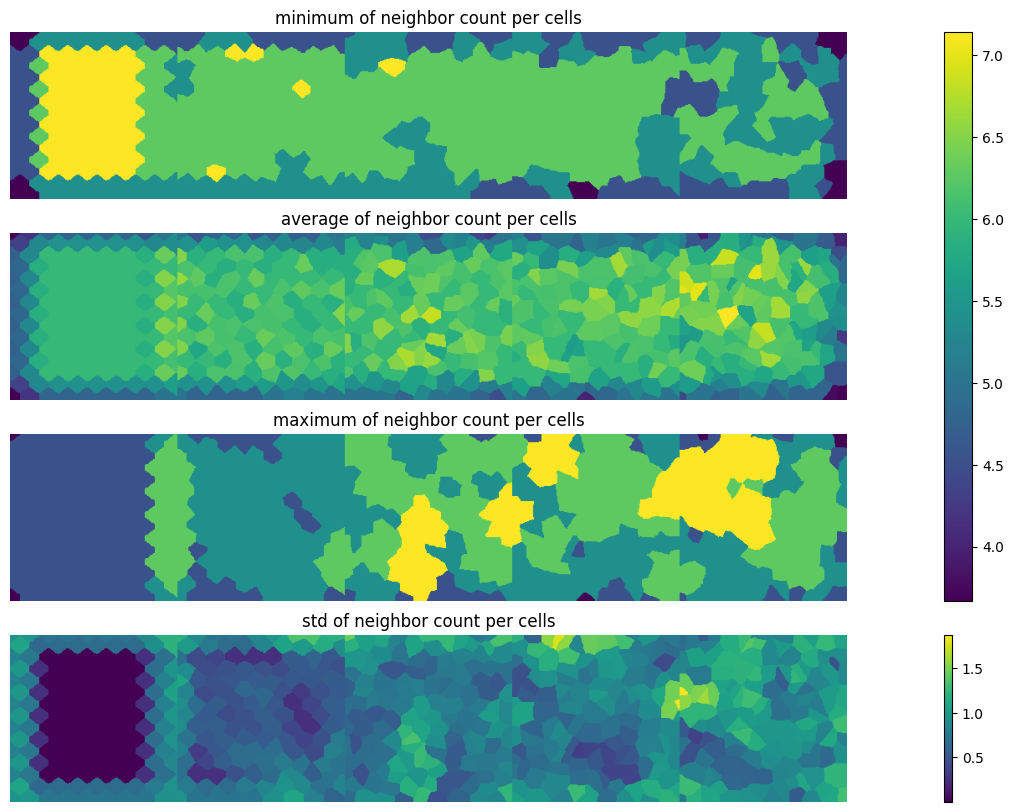

In [4]:
std_neighbor_count_map = cle.standard_deviation_of_touching_neighbors_map(neighbor_count_map, labels)
mean_neighbor_count_map = cle.mean_of_touching_neighbors_map(neighbor_count_map, labels)
max_neighbor_count_map = cle.maximum_of_touching_neighbors_map(neighbor_count_map, labels)
min_neighbor_count_map = cle.minimum_of_touching_neighbors_map(neighbor_count_map, labels)

fig, axs = plt.subplots(4,1, figsize=(25,10))
cax0 = axs[0].imshow(min_neighbor_count_map)
axs[0].set_title("minimum of neighbor count per cells")
cax2 = axs[1].imshow(mean_neighbor_count_map)
axs[1].set_title("average of neighbor count per cells")
cax1 = axs[2].imshow(max_neighbor_count_map)
axs[2].set_title("maximum of neighbor count per cells")
cax3 = axs[3].imshow(std_neighbor_count_map)
axs[3].set_title("std of neighbor count per cells")

for ax in axs:
    ax.set_axis_off()

plt.colorbar(cax2, ax=[axs[0], axs[1], axs[2]])
plt.colorbar(cax3, ax=axs[3])

plt.show()